# Stroke Prediction

## Introduction

We will predict strokes with these data.

Stroke is a medical emergency. A stroke occurs when blood flow to a part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die within minutes

- Risk factors for having a stroke include:
- Age: People aged 55 years and over

- Hypertension: if the systolic pressure is 140 mm Hg or more, or the diastolic pressure is 90 mm Hg or more

- Hypercholesterolemia: If the cholesterol level in the blood is 200 milligrams per deciliter

- Smoking

- Diabetes

- Obesity: if the body mass index (BMI) is 30 or more

### About Data

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

## 2. Importing Data

In [2]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = stroke_data.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print("Info: \n", df.info(), "\n---------------")
print("Describe: \n", df.describe().T, "\n---------------")
print("Null: \n", df.isnull().sum(), "\n---------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
Info: 
 None 
---------------
Describe: 
                     count          mean           std    min        25%  \
id                 5110.0  36517.829354 

##### There are null values present in 'bmi'.

In [4]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

##### We replaced null values of 'bmi' with mean in that column.

In [5]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 3. Data Visualization 

#### Heatmap Correlation

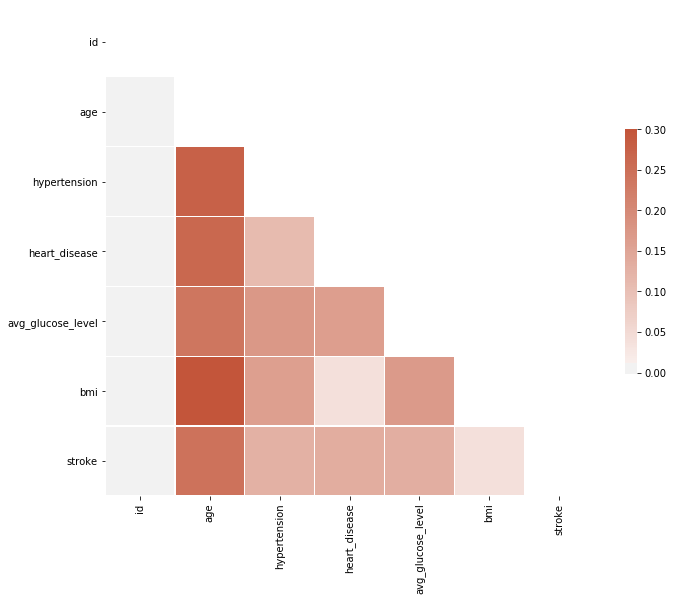

In [6]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

##### Stroke

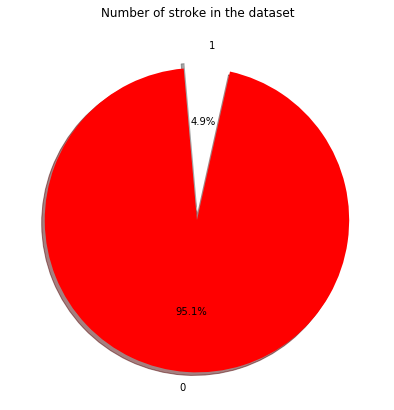

In [7]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["red","white"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=95,)

plt.title('Number of stroke in the dataset')
plt.show()

##### Histogram

In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
numericVar = ['age','avg_glucose_level', 'bmi']

In [10]:
def hist_plot(variable):
    plt.figure(figsize = (9,3))
    
    plt.hist(df[variable], bins=100)
    
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

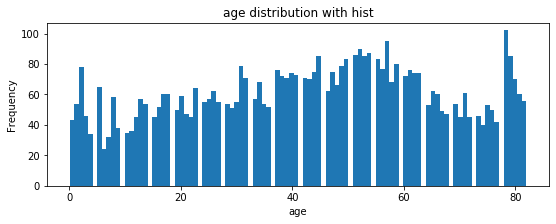

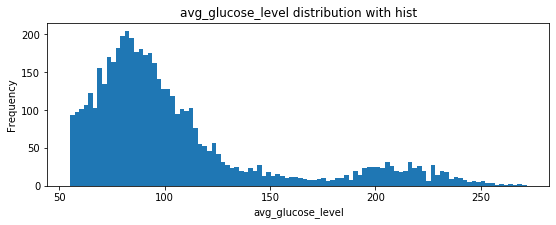

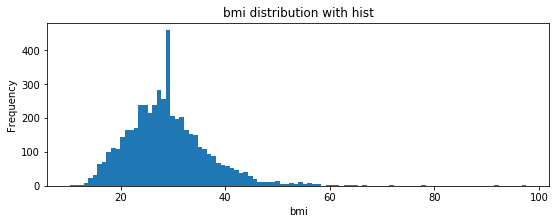

In [11]:
for n in numericVar:
    hist_plot(n)

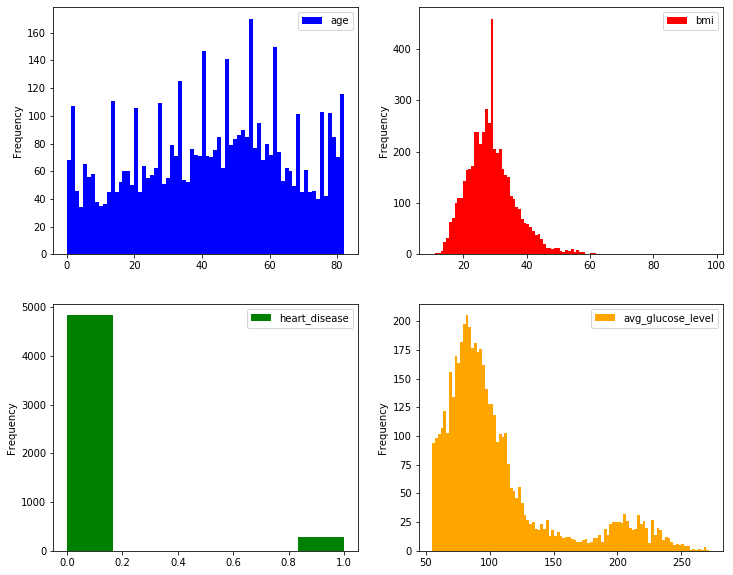

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

##### Gender

In [13]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

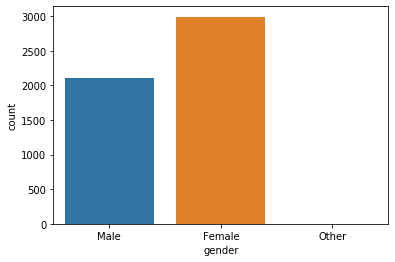

In [14]:
sns.countplot(data=df, x="gender");

In the data set, women are more than men.

##### Hypertension

In [15]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

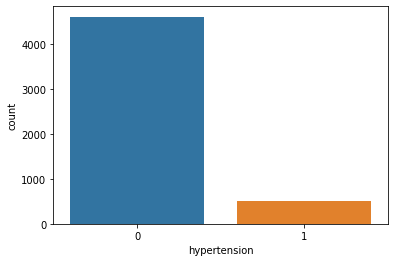

In [16]:
sns.countplot(data=df, x="hypertension");

##### Marriage Status

In [17]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

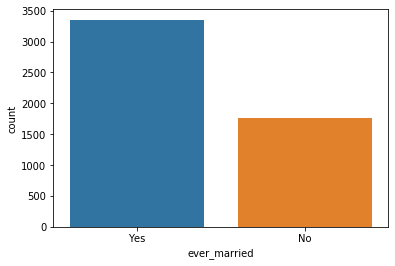

In [18]:
sns.countplot(data=df, x="ever_married");

##### Work Type

In [19]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

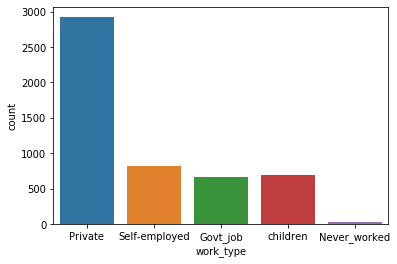

In [20]:
sns.countplot(data=df, x="work_type");

A lot of people works in Private sector.

##### Residence Type

In [21]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

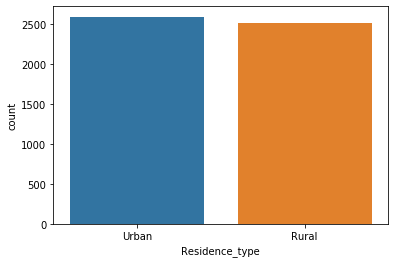

In [22]:
sns.countplot(data=df, x="Residence_type");

##### Smoking Status

In [23]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

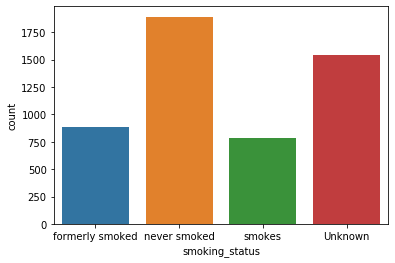

In [24]:
sns.countplot(data=df, x="smoking_status");

##### Pair Plot

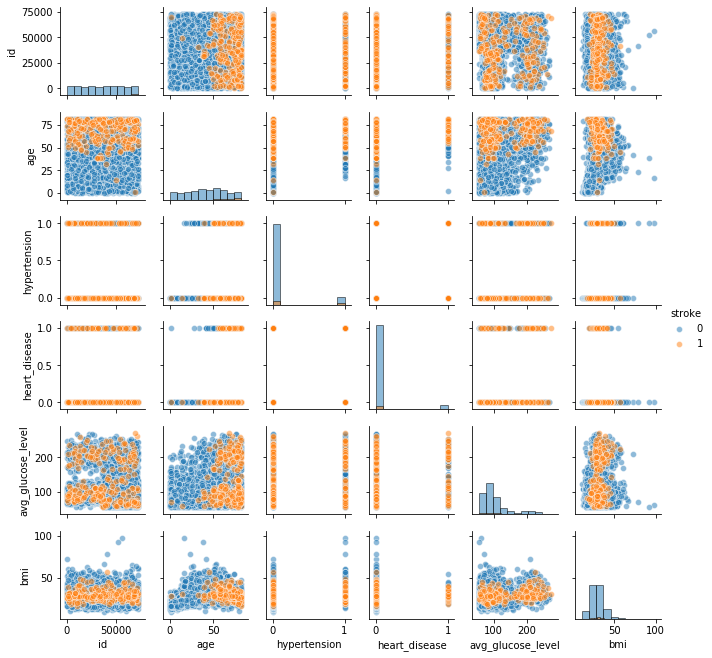

In [25]:
sns.pairplot(df, diag_kind='hist',  hue= 'stroke', height=1.5, 
             diag_kws={"edgecolor":"k", "alpha":0.5},
             plot_kws={"alpha":0.5})

## 4. Data Preprocessing

##### Stroke or not in Categorical Features

In [26]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

##### Encoding Categorical Features

In [27]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

 
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

##### Lable Encoding

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

#  Using Lable encoding
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,671,1,88,0,1,1,1,3850,240,1,0,1,0,0,0,0,1,0,0
1,3610,0,82,0,0,1,0,3588,162,1,0,0,1,0,0,0,0,1,0
2,2151,1,101,0,1,1,0,2483,199,1,0,0,1,0,0,0,1,0,0
3,4226,0,70,0,0,1,1,3385,218,1,0,0,0,1,0,0,1,0,0
4,114,0,100,1,0,1,0,3394,113,1,0,0,1,0,0,0,0,1,0


##### Standard Scaler

In [29]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [30]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,9046,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,2.706375,1.001234e+00,1.051434
1,51676,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,2.121559,1.384666e-15,0.786070
2,31112,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,-0.005028,4.685773e-01,1.626390
3,60182,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1.437358,7.154182e-01,0.255342
4,1665,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1.501184,-6.357112e-01,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,-0.494658,1.384666e-15,1.626390
5106,44873,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0.420775,1.442949e+00,1.670617
5107,19723,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.511443,2.217363e-01,-0.363842
5108,37544,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1.328257,-4.278451e-01,0.343796


In [31]:
df=df.drop(columns='id',axis=1)

##### Variable Selection

In [32]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 5. Classification Models

### KNN

In [34]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [35]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9419439008480104

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1452
           1       0.10      0.01      0.02        81

    accuracy                           0.94      1533
   macro avg       0.52      0.50      0.50      1533
weighted avg       0.90      0.94      0.92      1533



##### Model Tuning

In [37]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [38]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.9530342863402345
En iyi parametreler: {'n_neighbors': 8}


In [53]:
knn = KNeighborsClassifier(8)
knn_tuned = knn.fit(X_train, y_train)

In [54]:
knn_tuned.score(X_test, y_test)

0.9458577951728636

In [55]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9458577951728636

### SVC

In [56]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
svm_model

SVC(kernel='linear')

In [57]:
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9471624266144814

##### Model Tuning

In [58]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [59]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [60]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

In [61]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9471624266144814